<a href="https://colab.research.google.com/github/OmPShinde/DC-Micro-Project/blob/main/PSK_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a decimal number to transmit via Wi-Fi: 12
Decimal: 12
Binary: 1100


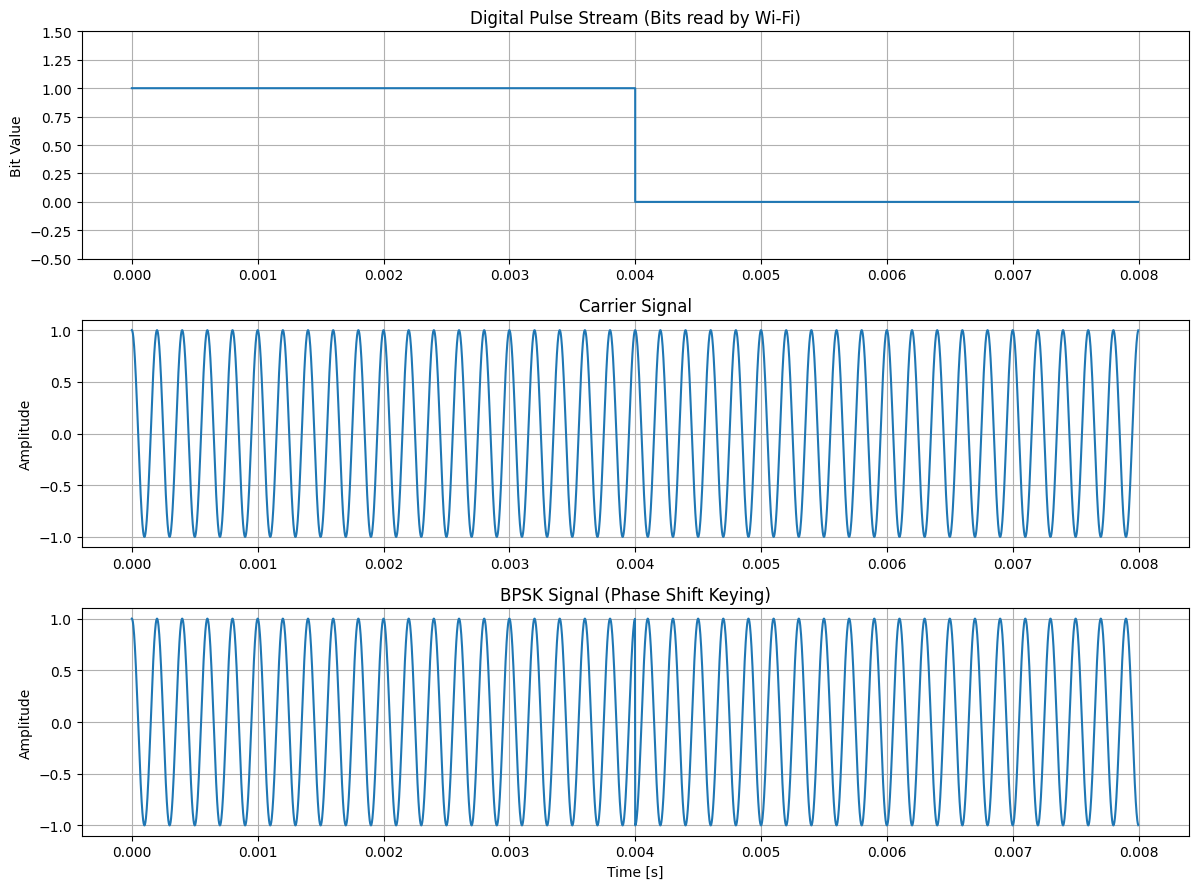

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Convert Decimal to Binary Bits
# -------------------------------
def decimal_to_bits(decimal_number):
    binary_str = bin(decimal_number)[2:]  # remove '0b'
    bits = [int(bit) for bit in binary_str]
    return bits, binary_str

# -------------------------------
# 2. Generate Carrier Signal
# -------------------------------
def generate_carrier(fc, fs, Tb, num_bits):
    samples_per_bit = int(Tb * fs)
    carrier_signal = np.cos(2 * np.pi * fc * np.arange(num_bits*samples_per_bit)/fs)
    return carrier_signal

# -------------------------------
# 3. Generate Pulse Stream
# -------------------------------
def generate_pulse_stream(bits, fs, Tb):
    samples_per_bit = int(Tb * fs)
    pulse_stream = np.array([])
    for bit in bits:
        pulse = np.ones(samples_per_bit) * bit
        pulse_stream = np.concatenate((pulse_stream, pulse))
    return pulse_stream

# -------------------------------
# 4. Generate BPSK Signal
# -------------------------------
def generate_bpsk(bits, fc, fs, Tb):
    samples_per_bit = int(Tb * fs)
    bpsk_signal = np.array([])
    for bit in bits:
        t = np.arange(samples_per_bit) / fs  # exact number of samples
        if bit == 0:
            bpsk = np.cos(2 * np.pi * fc * t + np.pi)  # phase shift 180°
        else:
            bpsk = np.cos(2 * np.pi * fc * t)          # 0° phase shift
        bpsk_signal = np.concatenate((bpsk_signal, bpsk))
    return bpsk_signal

# -------------------------------
# 5. Plot All Signals
# -------------------------------
def plot_signals(pulse_stream, carrier_signal, bpsk_signal, fs):
    # Total time vector based on signal length
    t_total = np.arange(len(pulse_stream)) / fs

    plt.figure(figsize=(12, 9))

    plt.subplot(3,1,1)
    plt.plot(t_total, pulse_stream, drawstyle='steps-post')
    plt.title("Digital Pulse Stream (Bits read by Wi-Fi)")
    plt.ylabel("Bit Value")
    plt.ylim(-0.5, 1.5)
    plt.grid(True)

    plt.subplot(3,1,2)
    plt.plot(t_total, carrier_signal)
    plt.title("Carrier Signal")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.subplot(3,1,3)
    plt.plot(t_total, bpsk_signal)
    plt.title("BPSK Signal (Phase Shift Keying)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# -------------------------------
# Main Program
# -------------------------------
def main():
    decimal_number = int(input("Enter a decimal number to transmit via Wi-Fi: "))

    # 1. Decimal → Bits
    bits, binary_str = decimal_to_bits(decimal_number)
    print(f"Decimal: {decimal_number}")
    print(f"Binary: {binary_str}")

    # Parameters
    fc = 5000    # Carrier frequency in Hz
    fs = 500000  # Sampling frequency in Hz
    Tb = 0.002   # Bit duration in seconds

    # 2. Carrier signal
    carrier_signal = generate_carrier(fc, fs, Tb, len(bits))

    # 3. Pulse stream
    pulse_stream = generate_pulse_stream(bits, fs, Tb)

    # 4. BPSK signal
    bpsk_signal = generate_bpsk(bits, fc, fs, Tb)

    # 5. Plot signals
    plot_signals(pulse_stream, carrier_signal, bpsk_signal, fs)

# Run the program
if __name__ == "__main__":
    main()
